In [1]:
import pkufiber as pf 

path = '/home/xiaoxinyu/TorchFiber/dataset_A800/train.h5'
# path = '/home/xiaoxinyu/dataset/test_80km.h5'

data = pf.data.FiberDataset(path, Nch=21, Rs=80, Pch=2, Nmodes=2,
    window_size=200000, strides=1, num_symb=200000, truncate=10000, 
    Tx_window=True, pre_transform='Rx_CDCDDLMS(taps=32,lr=[0.015625, 0.0078125])')

Rx,Tx,info = data[0]
metric = pf.ber(Rx,Tx)

print(Rx.shape, Tx.shape, info.shape)
for key in metric:
    print(key,':', metric[key])

data.get_info()

torch.Size([200000, 2]) torch.Size([200000, 2]) torch.Size([4])
BER : [0.00763   0.0077225]
SER : [0.030305 0.030595]
Qsq : [7.69835   7.6826687]
SNR : [14.50139  14.514064]
number of signals:  1


{'D(ps/nm/km)': 16.5,
 'Dpmd(ps/sqrt(km))': 3,
 'Fc(Hz)': 193414489032258.06,
 'Lcorr(km)': 0.1,
 'Lspan(km)': 80,
 'M(QAM-order)': 16,
 'NF(dB)': 4.5,
 'Nch': 21,
 'Nmodes': 2,
 'PMD': False,
 'Pch(dBm)': 2,
 'Rs(GHz)': 80,
 'alpha(dB/km)': 0.2,
 'amp': 'edfa',
 'batch': 1,
 'beta2(s^2/km)': -2.1044895291667401e-23,
 'distance(km)': 2000,
 'freqspace(Hz)': 96000000000.0,
 'gamma(/W/km)': 1.6567,
 'rx_seed': 1635108390,
 'tx_sps': 32}

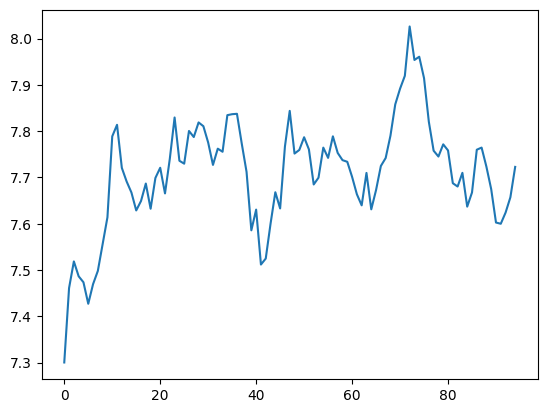

In [2]:
import matplotlib.pyplot as plt
plt.plot(pf.qfactor_path(Rx, Tx, stride=2000))

array([<Axes: >, <Axes: >], dtype=object)

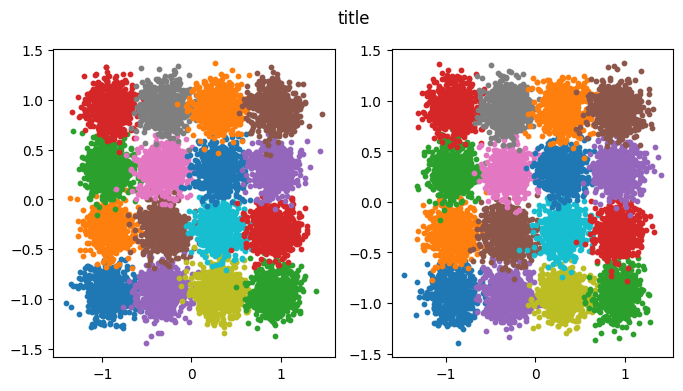

In [3]:
pf.show_symb(Rx[10000:20000], Tx[10000:20000])

In [1]:
from scripts.pbc_regression import RegressionPBC
import numpy as np 
model = RegressionPBC(window_size=11, rho=1)

ps = np.linspace(1.5, 3.5, 21)
gammas = np.linspace(1, 1, 1)
qs = []

for p in ps:
    for gamma in gammas:
        print(f'p = {p}, gamma = {gamma}')
        model.train(num_symb=40000, p=p, lamb_l2=0.01, gamma=gamma)
        Rx, Rx_hat, Tx, qsq = model.test(num_symb=40000)
        qs.append(qsq)

p = 1.5, gamma = 1.0
Training done!
CDC Q factor: 7.608661072971592
PBC Q factor: 7.81914122370223
Test done!
p = 1.6, gamma = 1.0
Training done!
CDC Q factor: 7.608661072971592
PBC Q factor: 7.827146867489537
Test done!
p = 1.7, gamma = 1.0
Training done!
CDC Q factor: 7.608661072971592
PBC Q factor: 7.824855668525604
Test done!
p = 1.8, gamma = 1.0
Training done!
CDC Q factor: 7.608661072971592
PBC Q factor: 7.8294410452848435
Test done!
p = 1.9, gamma = 1.0
Training done!
CDC Q factor: 7.608661072971592
PBC Q factor: 7.837495030131137
Test done!
p = 2.0, gamma = 1.0
Training done!
CDC Q factor: 7.608661072971592
PBC Q factor: 7.836918450408929
Test done!
p = 2.1, gamma = 1.0
Training done!
CDC Q factor: 7.608661072971592
PBC Q factor: 7.839803122803797
Test done!
p = 2.2, gamma = 1.0
Training done!
CDC Q factor: 7.608661072971592
PBC Q factor: 7.837495030131137
Test done!
p = 2.3, gamma = 1.0
Training done!
CDC Q factor: 7.608661072971592
PBC Q factor: 7.825428202860188
Test done!
p

Text(0.5, 1.0, 'more data: 20w symbols')

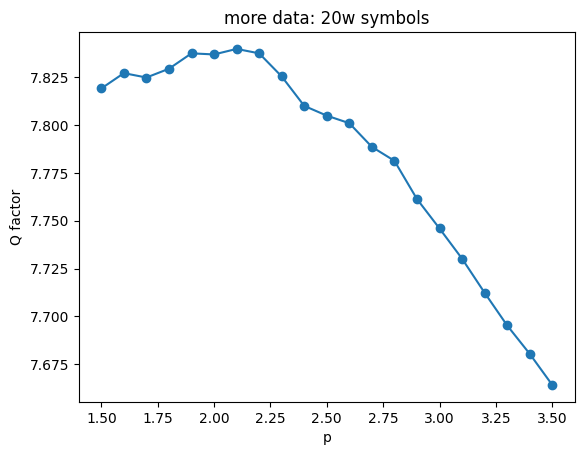

In [2]:
import matplotlib.pyplot as plt
plt.figure(dpi=100)
plt.plot(ps, qs, '-o')
plt.xlabel('p')
plt.ylabel('Q factor')
plt.title('more data: 20w symbols')

array([<Axes: >, <Axes: >], dtype=object)

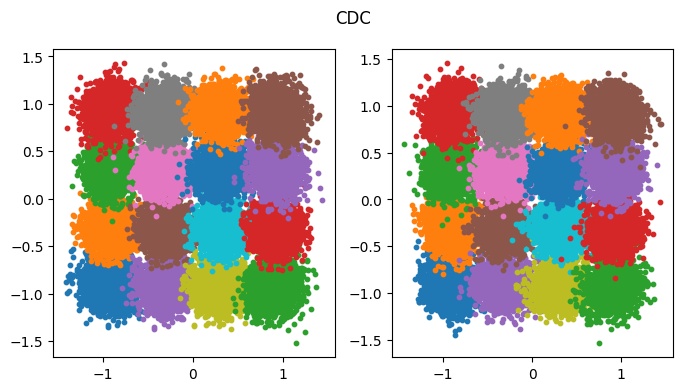

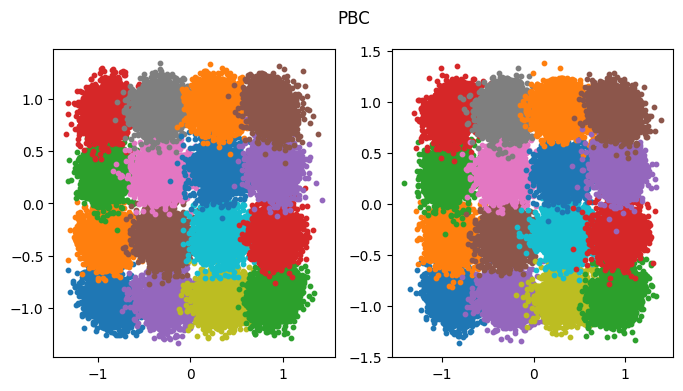

In [3]:
import pkufiber as pf
pf.show_symb(Rx , Tx, title='CDC')
pf.show_symb(Rx_hat , Tx, title='PBC')

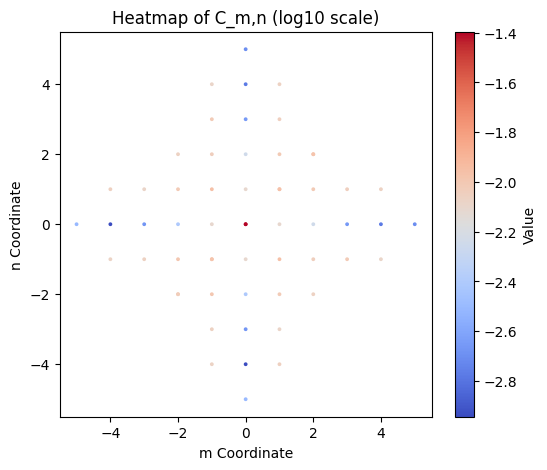

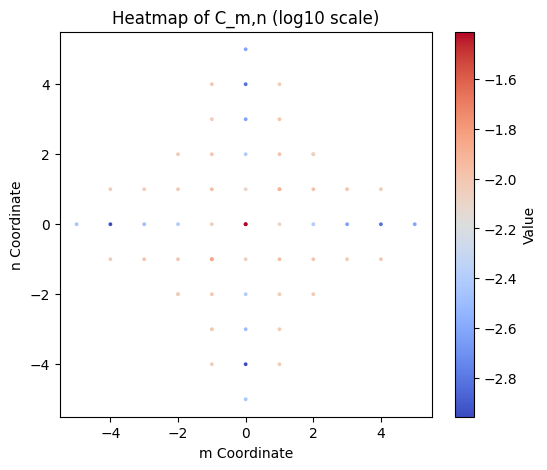

In [4]:
model.show()